In [39]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

from IPython.display import Image
from numpy.core.umath_tests import matrix_multiply as mm
from scipy.optimize import minimize
from scipy.stats import bernoulli, binom

In [40]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100

ll_old = 0
for i in range(max_iter):
    ws_A = []
    ws_B = []

    vs_A = []
    vs_B = []

    ll_new = 0

    # E-step: calculate probability distributions over possible completions
    for x in xs:

        # multinomial (binomial) log likelihood
        ll_A = np.sum([x*np.log(thetas[0])])
        ll_B = np.sum([x*np.log(thetas[1])])

        denom = np.exp(ll_A) + np.exp(ll_B)
        w_A = np.exp(ll_A)/denom
        w_B = np.exp(ll_B)/denom

        ws_A.append(w_A)
        ws_B.append(w_B)

        # used for calculating theta
        vs_A.append(np.dot(w_A, x))
        vs_B.append(np.dot(w_B, x))

        # update complete log likelihood
        ll_new += w_A * ll_A + w_B * ll_B

    # M-step: update values for parameters given current distribution
    #print(vs_A,np.sum(vs_A, 0))
    thetas[0] = np.sum(vs_A, 0)/np.sum(vs_A)
    thetas[1] = np.sum(vs_B, 0)/np.sum(vs_B)
    # print distribution of z for each x and current parameter estimate

    print ("Iteration: %d" % (i+1))
    print ("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new))

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new

Iteration: 1
theta_A = 0.71, theta_B = 0.58, ll = -32.69
Iteration: 2
theta_A = 0.75, theta_B = 0.57, ll = -31.26
Iteration: 3
theta_A = 0.77, theta_B = 0.55, ll = -30.76
Iteration: 4
theta_A = 0.78, theta_B = 0.53, ll = -30.33
Iteration: 5
theta_A = 0.79, theta_B = 0.53, ll = -30.07
Iteration: 6
theta_A = 0.79, theta_B = 0.52, ll = -29.95
Iteration: 7
theta_A = 0.80, theta_B = 0.52, ll = -29.90
Iteration: 8
theta_A = 0.80, theta_B = 0.52, ll = -29.88
Iteration: 9
theta_A = 0.80, theta_B = 0.52, ll = -29.87


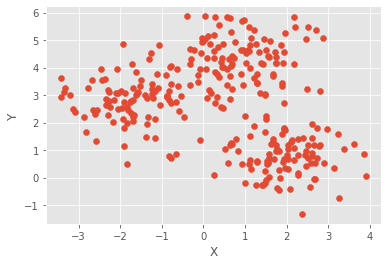

In [41]:
#Your turn
#The samples are comming from 3 gaussian distributions, 
#please find the source of each cluster & the corresponding parameter
#mu & sigma
import pandas as pd
df = pd.read_csv('raw_data.csv',index_col=0)
plt.scatter(df['X'],df['Y'])
plt.xlabel('X');
plt.ylabel('Y');

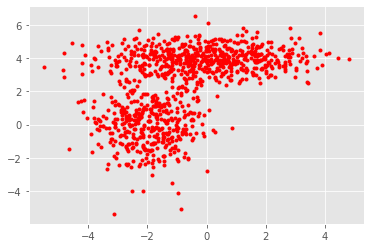

In [47]:
##Other examples
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

plt.plot(xs[:,0],xs[:,1],'r.')
# initial guesses for parameters
pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)


In [60]:
def em_gmm_vect(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs)
        ws /= ws.sum(0)

        # M-step
        pis = ws.sum(axis=1)
        pis /= n

        mus = np.dot(ws, xs)
        mus /= ws.sum(1)[:, None]

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = xs - mus[j, :]
            sigmas[j] = (ws[j,:,None,None] * mm(ys[:,:,None], ys[:,None,:])).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:,None,None]

        # update complete log likelihoood
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(xs)
        ll_new = np.log(ll_new).sum()
        print ("Iteration: %d" % (i+1))
        print ("mu_A", mus[0],"mu_B",mus[1])
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [61]:
ll2, pis2, mus2, sigmas2 = em_gmm_vect(xs, pis, mus, sigmas)


Iteration: 1
mu_A [-0.301 3.291] mu_B [-1.663 0.822]
Iteration: 2
mu_A [-0.223 3.485] mu_B [-1.742 0.594]
Iteration: 3
mu_A [-0.129 3.701] mu_B [-1.820 0.391]
Iteration: 4
mu_A [-0.052 3.871] mu_B [-1.885 0.235]
Iteration: 5
mu_A [-0.016 3.958] mu_B [-1.925 0.134]
Iteration: 6
mu_A [-0.012 3.984] mu_B [-1.937 0.085]
Iteration: 7
mu_A [-0.016 3.988] mu_B [-1.941 0.060]
Iteration: 8
mu_A [-0.020 3.986] mu_B [-1.943 0.046]
Iteration: 9
mu_A [-0.023 3.985] mu_B [-1.945 0.036]
Iteration: 10
mu_A [-0.025 3.983] mu_B [-1.946 0.029]
Iteration: 11
mu_A [-0.027 3.982] mu_B [-1.946 0.025]
Iteration: 12
mu_A [-0.028 3.982] mu_B [-1.947 0.022]
